# Задача 12

Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов, c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [1]:
#import different libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, metrics
from matplotlib import pyplot as plt

In [2]:

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18

In [17]:
wines = pd.read_csv('wine.txt')
wines.head()


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
print("Class 1", np.sum(wines['Class']==1))
print("Class 2", np.sum(wines['Class']==2))
print("Class 3", np.sum(wines['Class']==3))

('Class 1', 59)
('Class 2', 71)
('Class 3', 48)


In [20]:
y = wines['Class']
X = wines.drop('Class', axis=1)


In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=50)
max_neigbors = int(len(X_train)/2)

In [24]:
metricas = ["euclidean", "chebyshev", "minkowski"]
metricas_params=["", "", " 5"]
mistakes = [[],[],[]]
for i in range(3):
    for neighbors in range(3, max_neigbors):
        if (i == 2):
            classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=metricas[i], p=int(metricas_params[i]))
        else:
            classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=metricas[i])
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        mistakes[i].append((y_pred != y_test).sum())

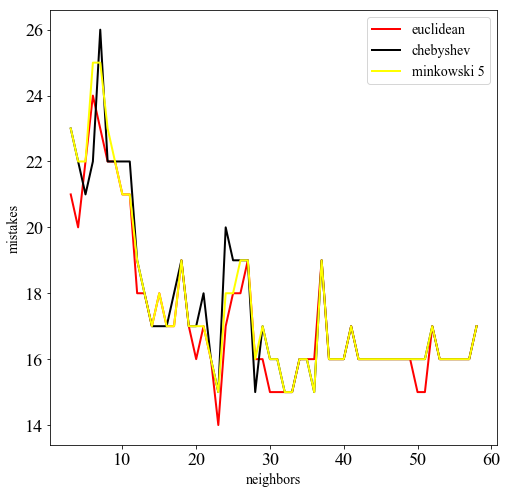

In [25]:
plt.figure(figsize=(8, 8))
colors = ['red', 'black', 'yellow']
for i in range(3): 
    plt.plot(range(3, max_neigbors), mistakes[i], color=colors[i], label=metricas[i]+metricas_params[i])
plt.xlabel('neighbors', fontsize=14)
plt.ylabel('mistakes', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

In [27]:
opt_neigbors_number = 27
std_mistake = []
mistake = []
test_sizes = np.linspace(0.1, 0.8, 30)
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=50)
    classifier = KNeighborsClassifier(n_neighbors=opt_neigbors_number, metric=metricas[0])
    clf=classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    std_mistake.append(np.std(y_pred != y_test))
    mistake.append((y_pred != y_test).sum())

Text(0,0.5,u'std mistakes')

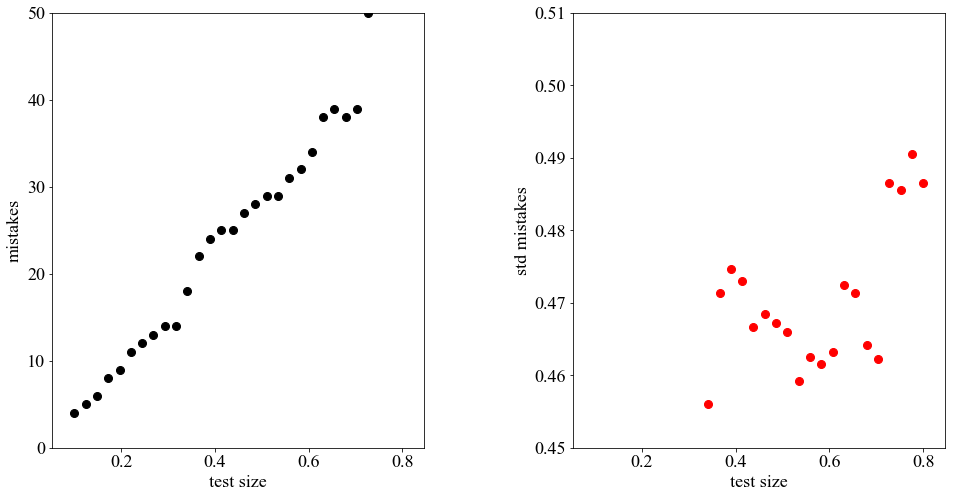

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.4)
ax1.scatter(test_sizes, mistake, color='black')
ax1.set_ylim(0, 50)

ax1.set_xlabel('test size')
ax1.set_ylabel('mistakes')
ax2.scatter(test_sizes, std_mistake, color='red')
ax2.set_ylim(0.45, 0.51)
ax2.set_xlabel('test size')
ax2.set_ylabel('std mistakes')